**MILESTONE-1-Requirements & Data Preparation**

In [2]:
import pandas as pd

# Load your dataset
data = pd.read_csv("C:\\Users\\vaidy\\Downloads\\dynamic_pricing.csv")
# Check first few rows
print(data.head())

# Check for null values
print("Null values per column:\n", data.isnull().sum())

# Check for duplicates
print("Number of duplicate rows:", data.duplicated().sum())

# Check data types and basic info
print(data.info())

# Check unique values for categorical columns (to find inconsistencies)
for col in data.select_dtypes(include='object').columns:
    print(f"Unique values in {col}: {data[col].unique()}")

   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76  

**Milestone-3-Exploratory Data Analysis (EDA)**

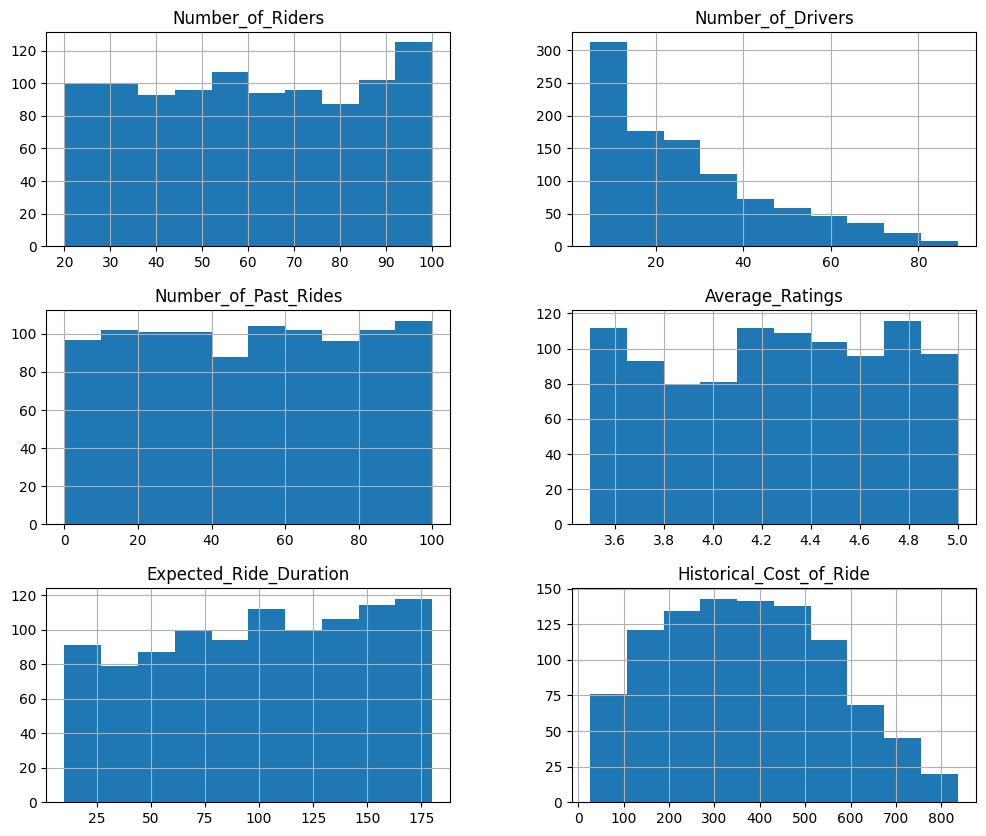

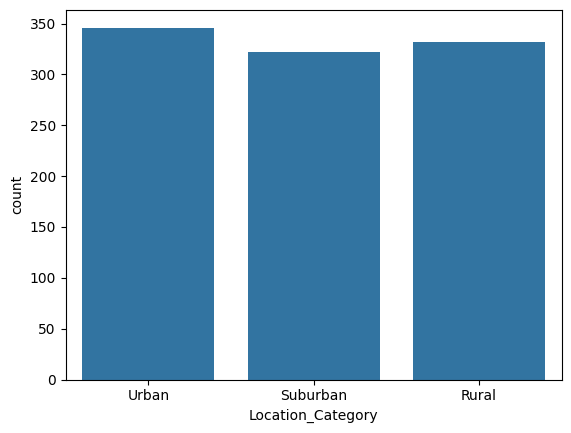

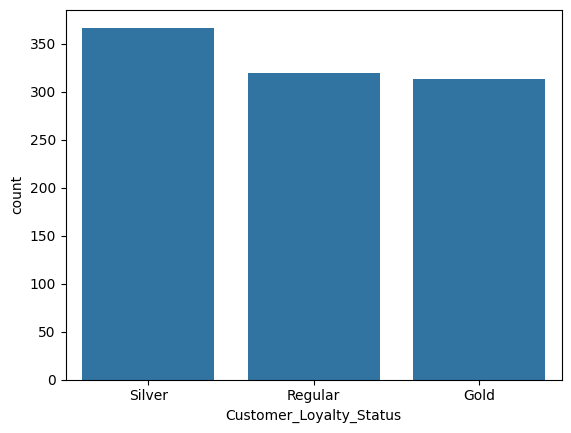

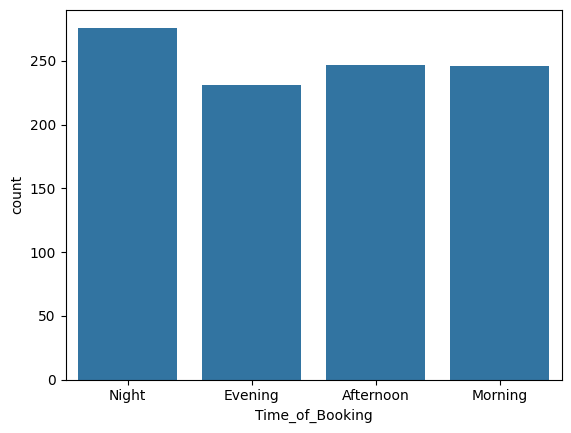

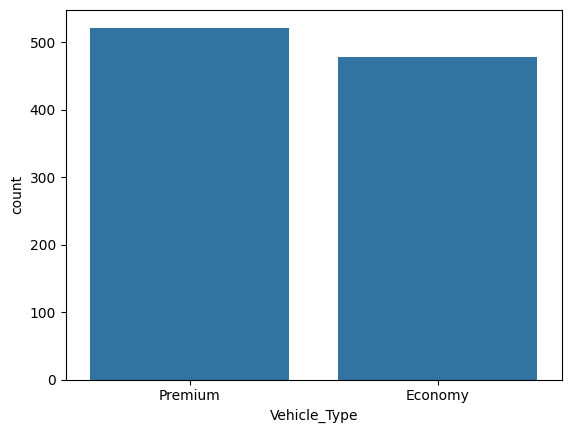

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numeric features
data.hist(figsize=(12,10))
plt.show()

# Countplots for categorical features
for col in data.select_dtypes(include='object').columns:
    sns.countplot(x=col, data=data)
    plt.show()


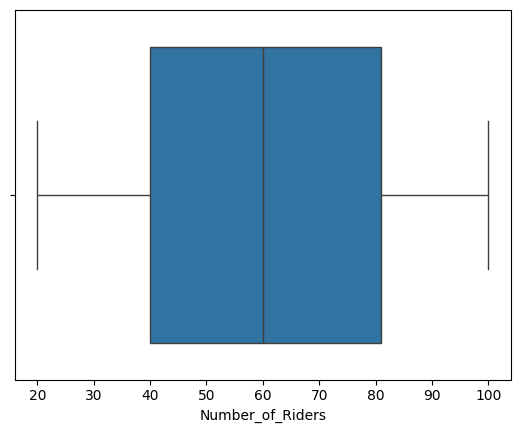

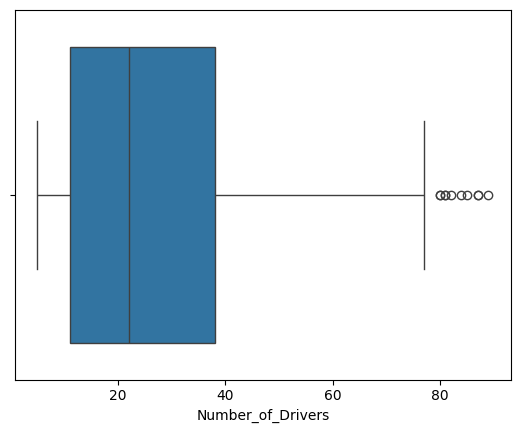

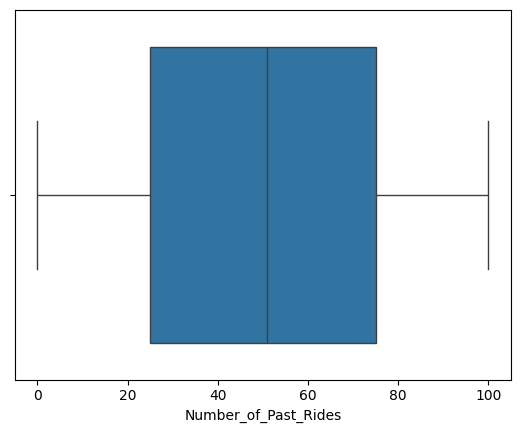

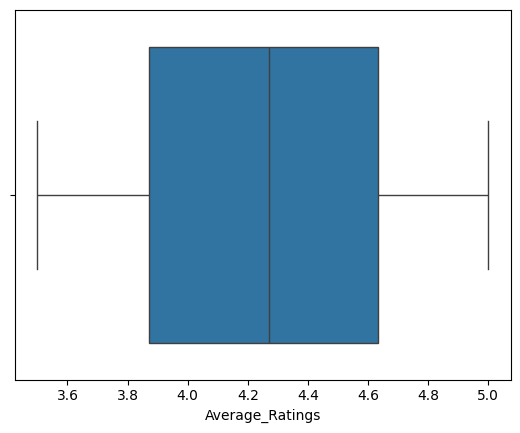

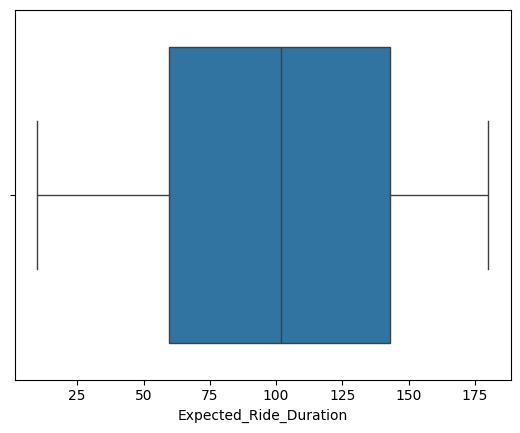

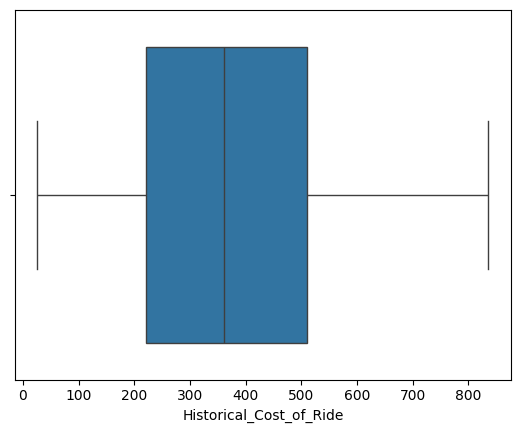

In [4]:
#with boxplot
for col in data.select_dtypes(include='number').columns:
    sns.boxplot(x=data[col])
    plt.show()


In [5]:
#withoutboxplot
for col in data.select_dtypes(include='number').columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]
    print(f"Outliers in {col}:\n", outliers)


Outliers in Number_of_Riders:
 Empty DataFrame
Columns: [Number_of_Riders, Number_of_Drivers, Location_Category, Customer_Loyalty_Status, Number_of_Past_Rides, Average_Ratings, Time_of_Booking, Vehicle_Type, Expected_Ride_Duration, Historical_Cost_of_Ride]
Index: []
Outliers in Number_of_Drivers:
      Number_of_Riders  Number_of_Drivers Location_Category  \
42                 97                 81          Suburban   
53                 95                 84          Suburban   
140                91                 80             Rural   
294                96                 80             Urban   
663                98                 87             Urban   
734                91                 81             Rural   
821                99                 89             Urban   
823               100                 85          Suburban   
876                98                 87          Suburban   
946                94                 82          Suburban   

    Customer_Loyal

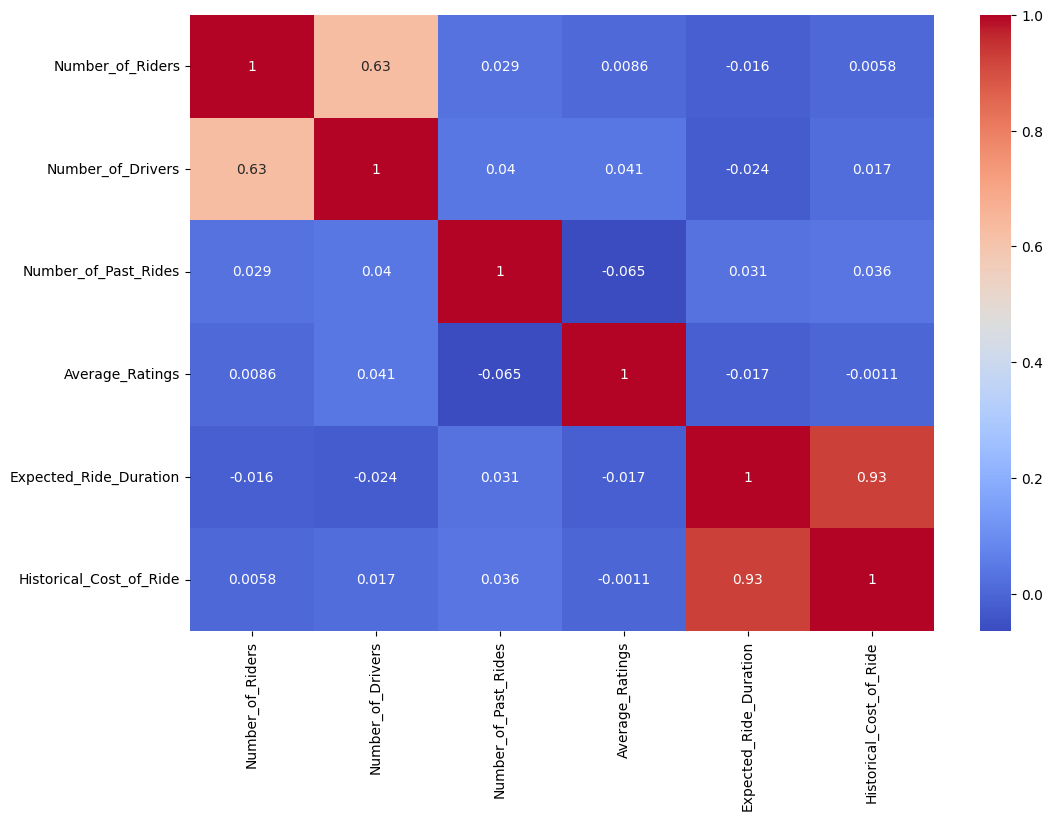

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r"C:\Users\vaidy\Downloads\dynamic_pricing.csv")

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()



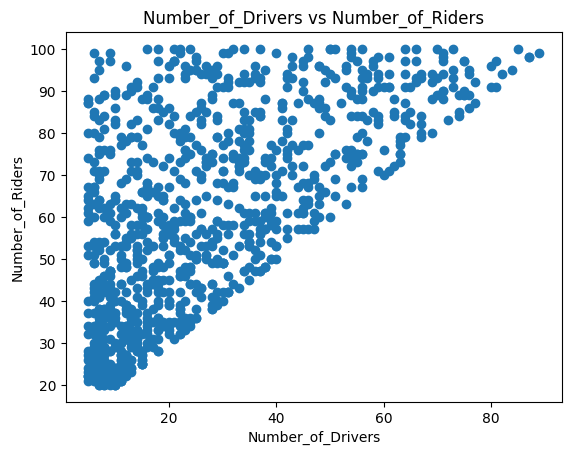

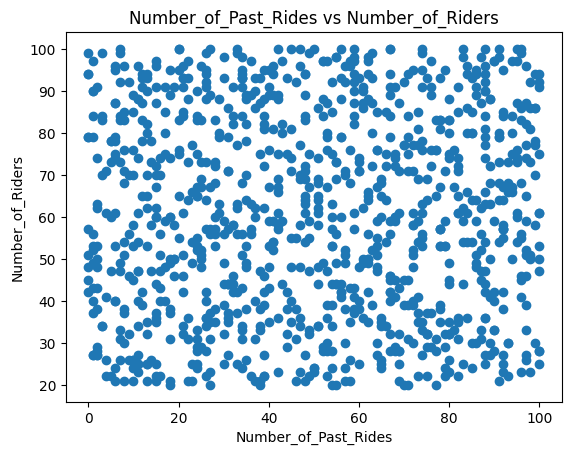

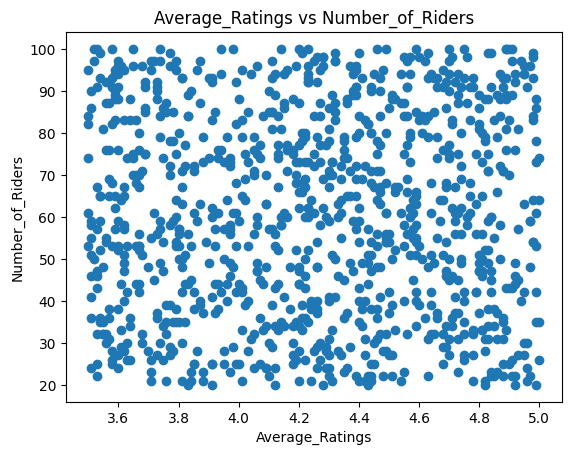

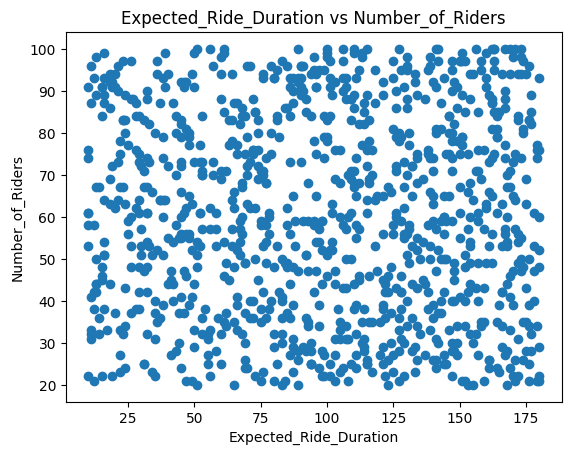

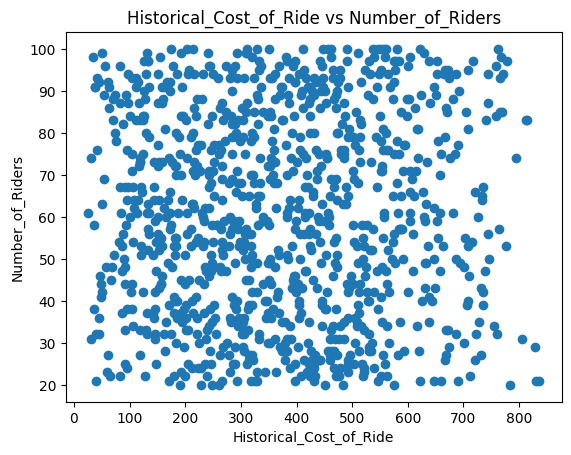

In [7]:
# Choose the first numeric column as target
target = data.select_dtypes(include='number').columns[0]

# Scatter plots to check linearity
for col in data.select_dtypes(include='number').columns:
    if col != target:
        plt.scatter(data[col], data[target])
        plt.xlabel(col)
        plt.ylabel(target)
        plt.title(f'{col} vs {target}')
        plt.show()





In [8]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)


In [9]:
# Summary statistics of numeric columns
print(data.describe())


       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000                25.993449  
25%           3.8

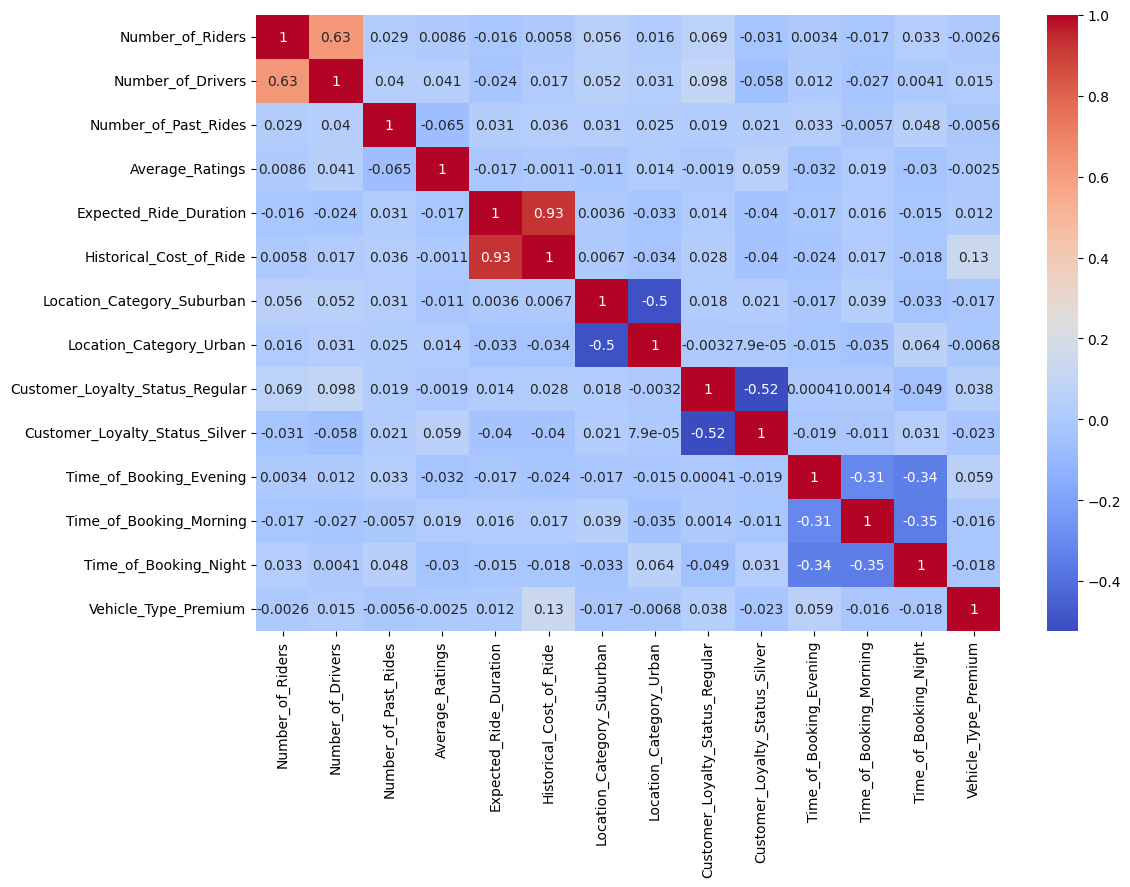

In [10]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()


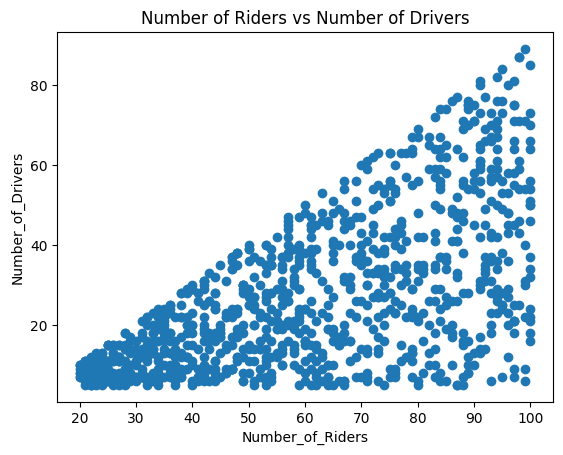

In [11]:
import matplotlib.pyplot as plt

if 'Number_of_Riders' in data.columns and 'Number_of_Drivers' in data.columns:
    plt.scatter(data['Number_of_Riders'], data['Number_of_Drivers'])
    plt.xlabel('Number_of_Riders')
    plt.ylabel('Number_of_Drivers')
    plt.title('Number of Riders vs Number of Drivers')
    plt.show()
else:
    print("Columns 'Number_of_Riders' or 'Number_of_Drivers' not found in dataset.")





Location_Category
Urban       346
Rural       332
Suburban    322
Name: count, dtype: int64
Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64
Time_of_Booking
Night        276
Afternoon    247
Morning      246
Evening      231
Name: count, dtype: int64
Vehicle_Type
Premium    522
Economy    478
Name: count, dtype: int64


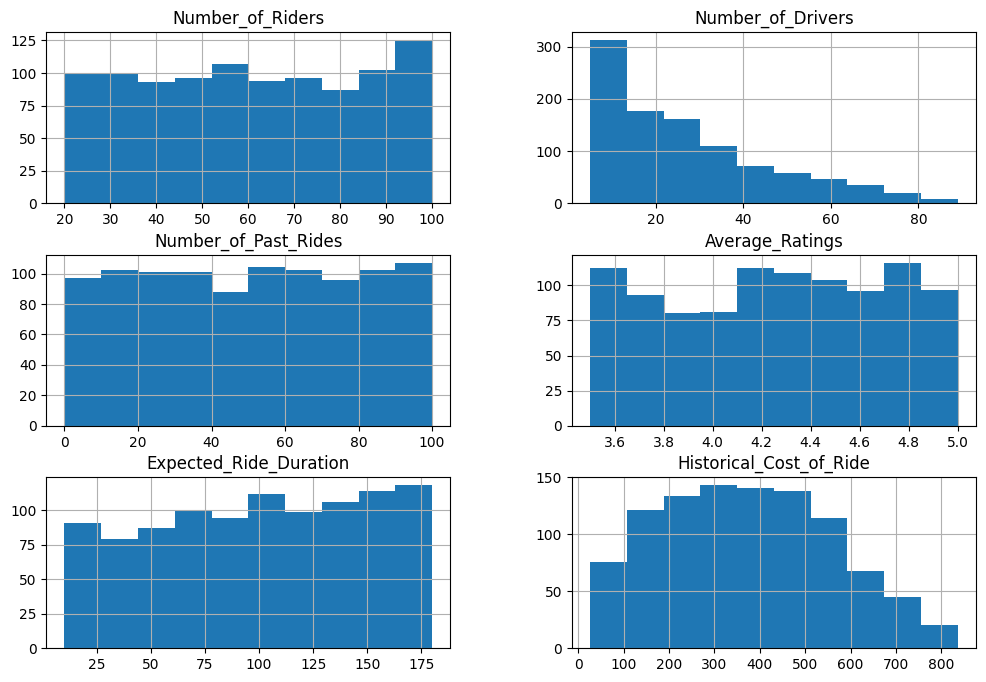

In [12]:
# Count of categorical features
for col in data.select_dtypes(include='object').columns:
    print(data[col].value_counts())

# Histograms for numeric features
data.select_dtypes(include='number').hist(figsize=(12,8))
plt.show()


In [13]:
# Fill numeric NA with mean (only numeric columns)
numeric_cols = data.select_dtypes(include='number').columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill categorical NA with mode
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].fillna(data[col].mode()[0])



In [14]:
data.to_csv(r"C:\Users\vaidy\Downloads\dynamic_pricing_cleaned.csv", index=False)



In [15]:
# 1) Handle categorical variables (Encoding)
data_encoded = pd.get_dummies(data, drop_first=True)  # one-hot encoding

In [16]:
# 2) Segmentations (Groupby)
# Example: check average price by customer segment (replace 'CustomerType' and 'Price' with actual column names)
if 'CustomerType' in data.columns and 'Price' in data.columns:
    seg = data.groupby('CustomerType')['Price'].mean()
    print(seg)

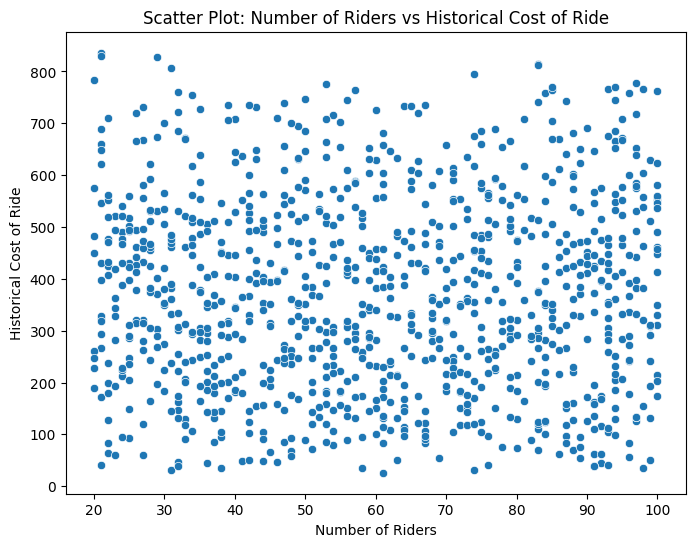

In [17]:
# 3) Scatter plot (Number of Riders vs Historical Cost of Ride)
import matplotlib.pyplot as plt
import seaborn as sns

if 'Number_of_Riders' in data.columns and 'Historical_Cost_of_Ride' in data.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=data['Number_of_Riders'], y=data['Historical_Cost_of_Ride'])
    plt.xlabel('Number of Riders')
    plt.ylabel('Historical Cost of Ride')
    plt.title('Scatter Plot: Number of Riders vs Historical Cost of Ride')
    plt.show()
else:
    print("Columns not found. Available columns are:", data.columns)


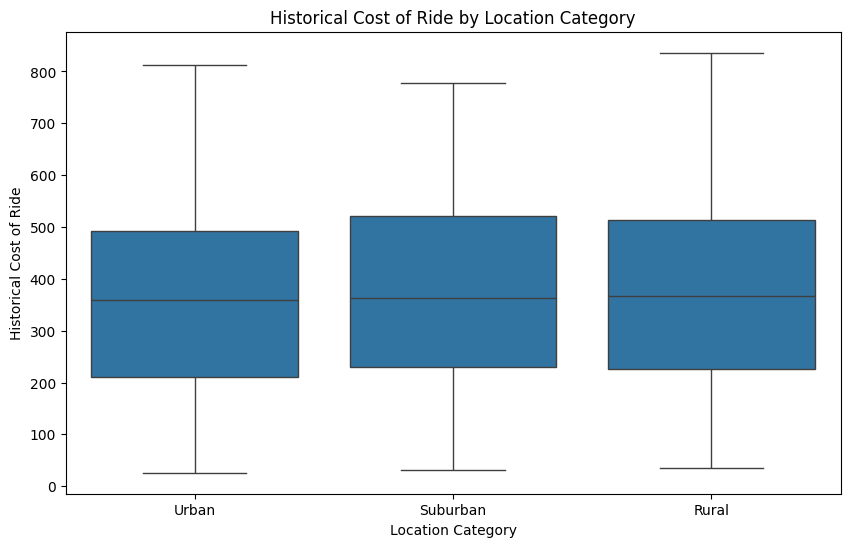

In [18]:
# 4) Boxplot by location (replace 'Location' and 'Price' with actual columns)
plt.figure(figsize=(10,6))
sns.boxplot(x='Location_Category', y='Historical_Cost_of_Ride', data=data)
plt.title('Historical Cost of Ride by Location Category')
plt.xlabel('Location Category')
plt.ylabel('Historical Cost of Ride')
plt.show()

In [19]:
# 5) Save cleaned data
data.to_csv(r"C:\Users\vaidy\Downloads\cleaned_csv_data.csv", index=False)

  Customer_Loyalty_Status  Historical_Cost_of_Ride
1                 Regular               380.125251
0                    Gold               376.118746
2                  Silver               362.772140


C:\Users\vaidy\AppData\Local\Temp\ipykernel_21496\2757843298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_Loyalty_Status', y='Historical_Cost_of_Ride', data=loyalty_price, palette='viridis')


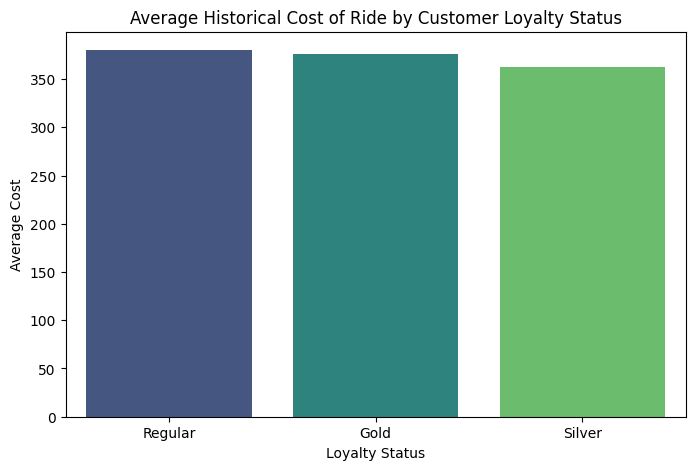

In [20]:
# Group by Customer_Loyalty_Status and calculate average Historical_Cost_of_Ride
loyalty_price = data.groupby('Customer_Loyalty_Status')['Historical_Cost_of_Ride'].mean().reset_index()

# Sort by price if you want
loyalty_price = loyalty_price.sort_values(by='Historical_Cost_of_Ride', ascending=False)

print(loyalty_price)

# Optional: plot it
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x='Customer_Loyalty_Status', y='Historical_Cost_of_Ride', data=loyalty_price, palette='viridis')
plt.title("Average Historical Cost of Ride by Customer Loyalty Status")
plt.ylabel("Average Cost")
plt.xlabel("Loyalty Status")
plt.show()


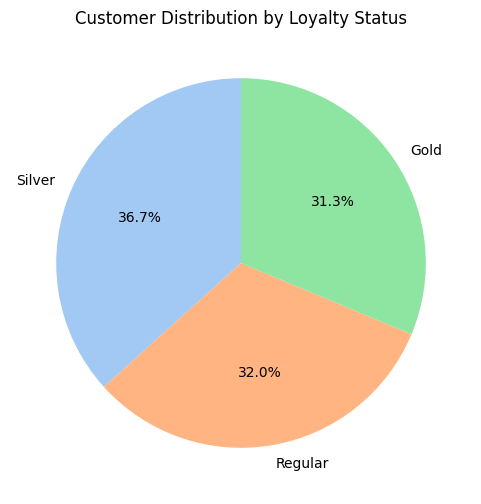

In [21]:
import matplotlib.pyplot as plt

# Count of customers by loyalty status
loyalty_counts = data['Customer_Loyalty_Status'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(loyalty_counts, labels=loyalty_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel', len(loyalty_counts)))
plt.title("Customer Distribution by Loyalty Status")
plt.show()


C:\Users\vaidy\AppData\Local\Temp\ipykernel_21496\3731770503.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loyalty_counts.index, y=loyalty_counts.values, palette='pastel')


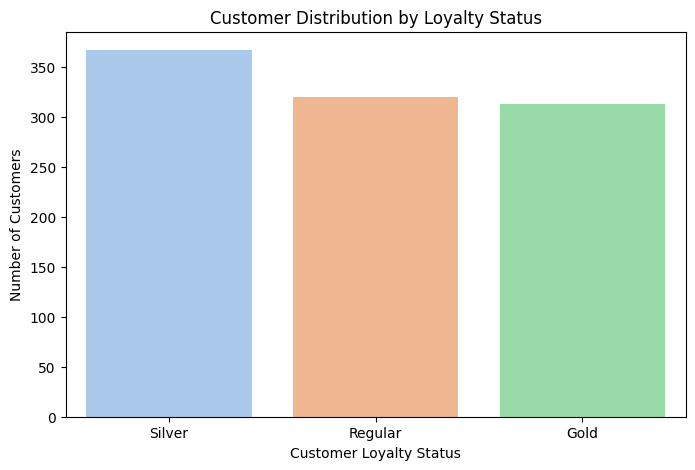

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of customers by loyalty status
loyalty_counts = data['Customer_Loyalty_Status'].value_counts()

# Bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=loyalty_counts.index, y=loyalty_counts.values, palette='pastel')
plt.xlabel("Customer Loyalty Status")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution by Loyalty Status")
plt.show()


**Kpi's**

Revenue by Loyalty Status:
 Customer_Loyalty_Status
Gold       117725.167606
Regular    121640.080307
Silver     133137.375437
Name: Historical_Cost_of_Ride, dtype: float64


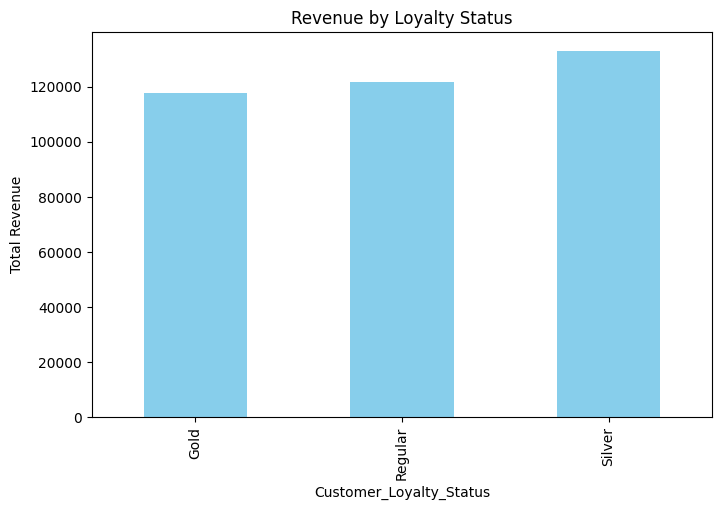

In [23]:
#revenue fit
# Total revenue per loyalty status
revenue_by_loyalty = data.groupby('Customer_Loyalty_Status')['Historical_Cost_of_Ride'].sum()
print("Revenue by Loyalty Status:\n", revenue_by_loyalty)

# Optional: visualize
revenue_by_loyalty.plot(kind='bar', figsize=(8,5), color='skyblue', title="Revenue by Loyalty Status")
plt.ylabel("Total Revenue")
plt.show()



Average Profit Margin: 97.93 %


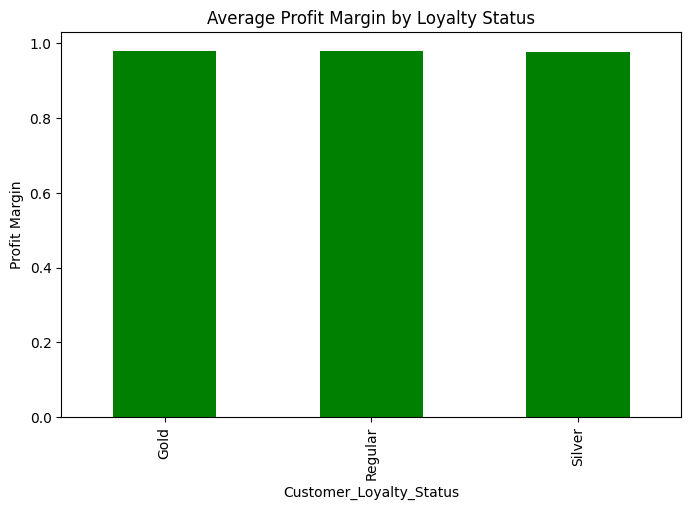

In [24]:
#profit margin
cost_per_ride = 5  # example fixed cost per ride

# Profit per ride
data['Profit'] = data['Historical_Cost_of_Ride'] - cost_per_ride

# Profit margin = Profit / Revenue
data['Profit_Margin'] = data['Profit'] / data['Historical_Cost_of_Ride']

# Average profit margin
avg_profit_margin = data['Profit_Margin'].mean()
print("Average Profit Margin:", round(avg_profit_margin*100,2), "%")

# Optional: visualize by loyalty status
profit_margin_by_loyalty = data.groupby('Customer_Loyalty_Status')['Profit_Margin'].mean()
profit_margin_by_loyalty.plot(kind='bar', color='green', figsize=(8,5), title="Average Profit Margin by Loyalty Status")
plt.ylabel("Profit Margin")
plt.show()


Conversion Rate by Loyalty Status:
 Customer_Loyalty_Status
Gold       30.633406
Regular    33.258795
Silver     36.107798
Name: Number_of_Riders, dtype: float64


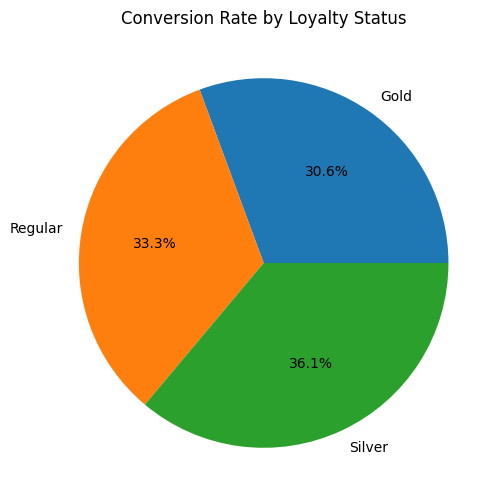

In [25]:
#conversion rate
#Conversion rate by loyalty status
conversion_by_loyalty = data.groupby('Customer_Loyalty_Status')['Number_of_Riders'].sum()
total_riders = conversion_by_loyalty.sum()
conversion_rate = (conversion_by_loyalty / total_riders) * 100
print("Conversion Rate by Loyalty Status:\n", conversion_rate)

# Pie chart visualization
conversion_rate.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title="Conversion Rate by Loyalty Status")
plt.ylabel("")
plt.show()


In [26]:

import pandas as pd

# Load dataset
data = pd.read_csv("C:\\Users\\vaidy\\Downloads\\dynamic_pricing.csv")

# Step 1: Calculate ratio (demand / supply)
data['ratio'] = data['Number_of_Riders'] / data['Number_of_Drivers']

# Step 2: Handle Time_of_Booking
# Map categorical times to numeric hours if needed
time_map = {
    'Morning': 8,
    'Afternoon': 14,
    'Evening': 18,
    'Night': 22
}

# Try converting to datetime, otherwise map categorical values
data['Booking_Hour'] = pd.to_datetime(
    data['Time_of_Booking'], errors='coerce'
).dt.hour

# Fill NaN values with mapped time if available
data.loc[data['Booking_Hour'].isna(), 'Booking_Hour'] = data['Time_of_Booking'].map(time_map)

# Step 3: Baseline pricing function
threshold = 0.5
base_price = 100  # Example static price

def baseline_price(row):
    if row['ratio'] > threshold:
        return base_price * (1 + (row['ratio'] - threshold))  # Increase price
    else:
        return base_price * (1 - (threshold - row['ratio']))  # Decrease price

# Apply baseline pricing
data['Dynamic_Price'] = data.apply(baseline_price, axis=1)

# Step 4: Simulate revenue
data['Dynamic_Revenue'] = data['Dynamic_Price'] * data['Number_of_Riders']
static_revenue = base_price * data['Number_of_Riders'].sum()
dynamic_revenue = data['Dynamic_Revenue'].sum()
revenue_lift = dynamic_revenue - static_revenue

# Step 5: Price variation KPI
data['Price_Variation_Percentage'] = ((data['Dynamic_Price'] - base_price) / base_price) * 100

# KPI outputs
print("=== KPI Overview ===")
print(f"Static Revenue: {static_revenue:.2f}")
print(f"Dynamic Revenue: {dynamic_revenue:.2f}")
print(f"Revenue Lift: {revenue_lift:.2f}")
print(f"Average Price Variation: {data['Price_Variation_Percentage'].mean():.2f}%")
print(data[['Number_of_Riders', 'Number_of_Drivers', 'Dynamic_Price', 'Price_Variation_Percentage', 'Booking_Hour']].head())


=== KPI Overview ===
Static Revenue: 6037200.00
Dynamic Revenue: 22975994.09
Revenue Lift: 16938794.09
Average Price Variation: 273.55%
   Number_of_Riders  Number_of_Drivers  Dynamic_Price  \
0                90                 45     250.000000   
1                58                 39     198.717949   
2                42                 31     185.483871   
3                89                 28     367.857143   
4                78                 22     404.545455   

   Price_Variation_Percentage  Booking_Hour  
0                  150.000000          22.0  
1                   98.717949          18.0  
2                   85.483871          14.0  
3                  267.857143          14.0  
4                  304.545455          14.0  


C:\Users\vaidy\AppData\Local\Temp\ipykernel_21496\3761471950.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Booking_Hour'] = pd.to_datetime(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("dynamic_pricing.csv")

# Check columns once
print(df.columns)

# 1. Ratio vs Price (ratio = price / competitor_price)
df['price_ratio'] = df['price'] / df['competitor_price']

plt.figure(figsize=(6,4))
plt.scatter(df['price_ratio'], df['price'], alpha=0.6)
plt.title('Price Ratio vs Price')
plt.xlabel('Price Ratio (Our Price / Competitor Price)')
plt.ylabel('Our Price')
plt.grid(True)
plt.show()

# 2. Time (week) vs Price
plt.figure(figsize=(6,4))
plt.plot(df['week'], df['price'], marker='o', alpha=0.7)
plt.title('Week vs Price')
plt.xlabel('Week')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# 3. Revenue Comparison (static vs dynamic)
# Simulate static revenue using base_price if not present
if 'base_price' in df.columns:
    df['revenue_static'] = df['base_price'] * df['demand']
else:
    df['revenue_static'] = df['price'].mean() * df['demand']

df['revenue_dynamic'] = df['revenue']

revenue_comparison = df[['revenue_static', 'revenue_dynamic']].sum()

plt.figure(figsize=(5,4))
revenue_comparison.plot(kind='bar', color=['gray', 'skyblue'])
plt.title('Static vs Dynamic Pricing Revenue Comparison')
plt.ylabel('Total Revenue')
plt.show()

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')


KeyError: 'price'

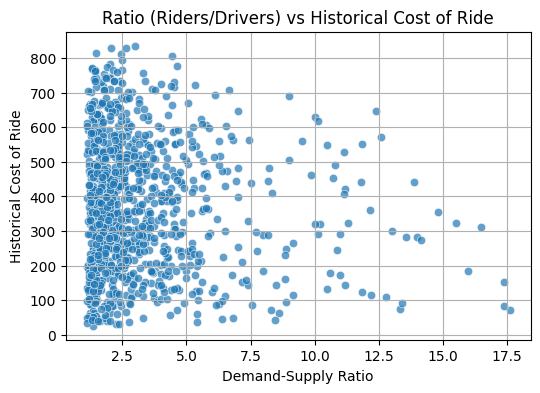

C:\Users\vaidy\AppData\Local\Temp\ipykernel_18984\3686872633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Time_of_Booking', y='Historical_Cost_of_Ride', data=df, palette='pastel')


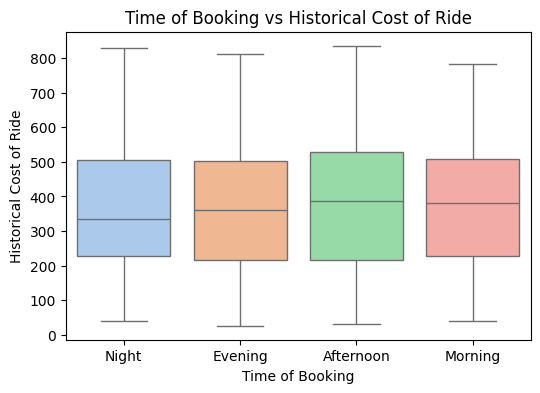

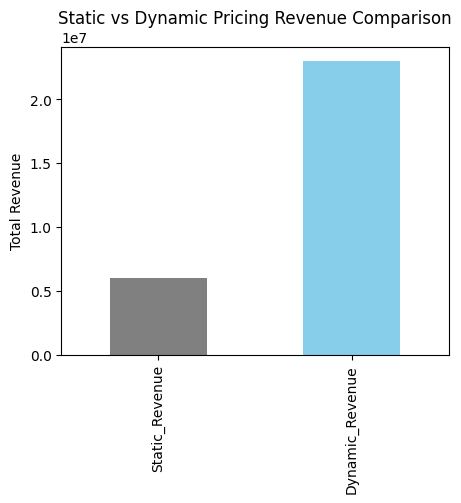

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:\\Users\\vaidy\\Downloads\\dynamic_pricing.csv")

# 1. Ratio vs Historical Cost (ratio = riders / drivers)
df['ratio'] = df['Number_of_Riders'] / df['Number_of_Drivers']

plt.figure(figsize=(6,4))
sns.scatterplot(x='ratio', y='Historical_Cost_of_Ride', data=df, alpha=0.7)
plt.title("Ratio (Riders/Drivers) vs Historical Cost of Ride")
plt.xlabel("Demand-Supply Ratio")
plt.ylabel("Historical Cost of Ride")
plt.grid(True)
plt.show()

# 2. Time of Booking vs Historical Cost
plt.figure(figsize=(6,4))
sns.boxplot(x='Time_of_Booking', y='Historical_Cost_of_Ride', data=df, palette='pastel')
plt.title("Time of Booking vs Historical Cost of Ride")
plt.xlabel("Time of Booking")
plt.ylabel("Historical Cost of Ride")
plt.show()

# 3. Revenue comparison (Dynamic simulation)
base_price = 100
df['ratio'] = df['Number_of_Riders'] / df['Number_of_Drivers']
threshold = 0.5

def baseline_price(row):
    if row['ratio'] > threshold:
        return base_price * (1 + (row['ratio'] - threshold))
    else:
        return base_price * (1 - (threshold - row['ratio']))

df['Dynamic_Price'] = df.apply(baseline_price, axis=1)
df['Static_Revenue'] = base_price * df['Number_of_Riders']
df['Dynamic_Revenue'] = df['Dynamic_Price'] * df['Number_of_Riders']

revenues = df[['Static_Revenue', 'Dynamic_Revenue']].sum()

plt.figure(figsize=(5,4))
revenues.plot(kind='bar', color=['gray', 'skyblue'])
plt.title("Static vs Dynamic Pricing Revenue Comparison")
plt.ylabel("Total Revenue")
plt.show()


### > MILESTONE-5

## Step 1 — Problem framing
We predict demand (Number_of_Riders). Then we find the price that gives maximum revenue = price * predicted_demand(price).


# Step 2 — Feature engineering & train/test split

In [2]:
# Step 2: features and splits
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df = pd.read_csv("C:\\Users\\vaidy\\Downloads\\dynamic_pricing.csv")
# create ratio
df['ratio'] = df['Number_of_Riders'] / df['Number_of_Drivers']

# features and target
cat_cols = ['Time_of_Booking','Location_Category','Customer_Loyalty_Status','Vehicle_Type']
num_cols = ['Number_of_Drivers','Number_of_Past_Rides','Average_Ratings','Expected_Ride_Duration','ratio']

X = df[cat_cols + num_cols]
y = df['Number_of_Riders']

preproc = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

# If you have a time order, split by time; else simple random split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


### Step 3 — Baseline model and evaluation
Train a simple model as baseline. We also define a revenue simulation function that finds the best price from a grid for each example.


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# simple baseline
pipe_rf = Pipeline([('pre', preproc), ('model', RandomForestRegressor(random_state=42, n_estimators=100))])
pipe_rf.fit(X_train, y_train)
y_pred = pipe_rf.predict(X_test)

def eval_reg(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred) ** 0.5
    mae = mean_absolute_error(y_true, y_pred)
    return {'rmse': rmse, 'mae': mae}

print("Baseline metrics:", eval_reg(y_test, y_pred))

# revenue sim function: for each row, search price grid and pick price maximizing price * predicted_demand(price)
def simulate_revenue(model, X_df, price_grid, base_price=100):
    # we will add a 'price' feature to X for prediction; many features are independent of price in this dataset,
    # so we simulate by setting Historical_Cost_of_Ride to candidate price if needed
    rev = 0
    for _, row in X_df.iterrows():
        best = 0
        best_price = base_price
        for p in price_grid:
            xr = row.copy()
            # if model used Historical_Cost_of_Ride, set it; else not used
            if 'Historical_Cost_of_Ride' in X_df.columns:
                xr['Historical_Cost_of_Ride'] = p
            # make single-row DataFrame
            xr_df = pd.DataFrame([xr])
            pred_d = model.predict(xr_df)[0]
            est_rev = p * max(pred_d, 0)
            if est_rev > best:
                best = est_rev
                best_price = p
        rev += best
    return rev


Baseline metrics: {'rmse': 3.009337302463783, 'mae': 2.1474}


### Step 4 — Train XGBoost and LightGBM
Train both gradient boosting models with default settings. Compare RMSE and MAE to baseline.


In [5]:
# Install packages if not installed: pip install xgboost lightgbm
from xgboost import XGBRegressor
import lightgbm as lgb

pipe_xgb = Pipeline([('pre', preproc), ('model', XGBRegressor(random_state=42, n_estimators=200, tree_method='hist'))])
pipe_lgb = Pipeline([('pre', preproc), ('model', lgb.LGBMRegressor(random_state=42, n_estimators=200))])

pipe_xgb.fit(X_train, y_train)
pipe_lgb.fit(X_train, y_train)

y_pred_xgb = pipe_xgb.predict(X_test)
y_pred_lgb = pipe_lgb.predict(X_test)

print("XGBoost metrics:", eval_reg(y_test, y_pred_xgb))
print("LightGBM metrics:", eval_reg(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 17
[LightGBM] [Info] Start training from score 60.766250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

c:\Users\vaidy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


### Step 5 — Hyperparameter tuning
Use RandomizedSearchCV to tune hyperparameters for XGBoost and LightGBM. Keep cv and scoring consistent. Aim for reduced RMSE and improved revenue simulation.


In [6]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Example param grid for XGBoost
param_dist_xgb = {
    'model__n_estimators': [100,200,400],
    'model__max_depth': [3,5,7,9],
    'model__learning_rate': [0.01,0.05,0.1],
    'model__subsample': [0.6,0.8,1.0],
    'model__colsample_bytree': [0.6,0.8,1.0]
}

rs_xgb = RandomizedSearchCV(pipe_xgb, param_distributions=param_dist_xgb, n_iter=20, cv=3, scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)
rs_xgb.fit(X_train, y_train)
print("Best XGB params:", rs_xgb.best_params_)
print("XGB best CV score:", -rs_xgb.best_score_)

# Similar for LightGBM
param_dist_lgb = {
    'model__n_estimators': [100,200,400],
    'model__num_leaves': [31,63,127],
    'model__learning_rate': [0.01,0.05,0.1],
    'model__feature_fraction': [0.6,0.8,1.0],
    'model__bagging_fraction': [0.6,0.8,1.0],
    'model__min_data_in_leaf': [20,50,100]
}
rs_lgb = RandomizedSearchCV(pipe_lgb, param_distributions=param_dist_lgb, n_iter=20, cv=3, scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)
rs_lgb.fit(X_train, y_train)
print("Best LGB params:", rs_lgb.best_params_)
print("LGB best CV score:", -rs_lgb.best_score_)


Best XGB params: {'model__subsample': 1.0, 'model__n_estimators': 400, 'model__max_depth': 3, 'model__learning_rate': 0.1, 'model__colsample_bytree': 1.0}
XGB best CV score: 2.977912346522013
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing 

### Step 6 — Backtesting with rolling-origin
We perform rolling backtests: train on older data, validate on later windows. We compute static vs dynamic revenue per window and examine average revenue lift.


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

# Load dataset
df = pd.read_csv("C:\\Users\\vaidy\\Downloads\\dynamic_pricing.csv")

# Drop missing rows (if any)
df = df.dropna()

# Automatically encode all object or category columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = df[col].astype('category').cat.codes

# Define target and features
target = 'Number_of_Riders'
features = [col for col in df.columns if col != target]

X = df[features]
y = df[target]

# Rolling backtest setup
tscv = TimeSeriesSplit(n_splits=4)
results = []

base_price = 100
price_grid = list(range(60, 161, 5))

for i, (train_idx, test_idx) in enumerate(tscv.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)

    static_rev = (base_price * y_test).sum()
    dynamic_rev = (preds * base_price).sum()
    lift = dynamic_rev - static_rev

    results.append({
        'Split': i+1,
        'RMSE': rmse,
        'MAE': mae,
        'Static_Revenue': static_rev,
        'Dynamic_Revenue': dynamic_rev,
        'Lift': lift
    })

bt_res = pd.DataFrame(results)
print(bt_res)
print("\nAverage Lift:", bt_res['Lift'].mean())




   Split       RMSE        MAE  Static_Revenue  Dynamic_Revenue          Lift
0      1  21.478259  17.307367         1282300     1.218041e+06 -64259.460795
1      2  20.857788  17.286520         1184100     1.236017e+06  51916.539234
2      3  18.630681  14.906747         1187200     1.202453e+06  15253.392982
3      4  18.429912  15.166012         1191900     1.212548e+06  20648.240636

Average Lift: 5889.678014257923


### Step 7 — Final evaluation
We report model regression metrics and business KPIs (revenue lift %). This shows if the model gives real business value.


In [24]:
# Step 7 — Final Evaluation

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Regression metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Business KPI — revenue lift (%)
actual_revenue = (y_test * X_test['Expected_Ride_Duration']).sum()
predicted_revenue = (y_pred * X_test['Expected_Ride_Duration']).sum()
revenue_lift = ((predicted_revenue - actual_revenue) / actual_revenue) * 100

print("Final Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")
print(f"Revenue Lift: {revenue_lift:.2f}%")



Final Evaluation:
RMSE: 18.43
R² Score: 0.467
Revenue Lift: 1.71%
